In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import matplotlib as mpl


mpl.rcParams['agg.path.chunksize'] = 10000


## EDA for 2018

In [3]:
df_2020 = pd.read_csv('f1_telemetry_2020.csv')
#change time to seconds
df_2020['Time'] = pd.to_timedelta(df_2020['Time'])
df_2020['Time_seconds'] = df_2020['Time'].dt.total_seconds()
df_2020.head(5)
#check for missing values
df_2020.isna().sum()

Speed           0
Throttle        0
Brake           0
nGear           0
DRS             0
Time            0
Driver          0
LapNumber       0
RaceName        0
Time_seconds    0
dtype: int64

KeyboardInterrupt: 

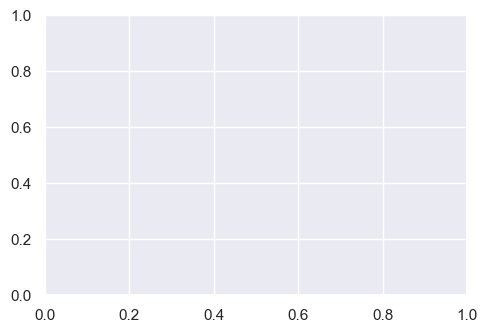

In [4]:
# visualize distribution of continuous features
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Speed', 'Throttle', 'Brake', 'nGear']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_2020[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

/var/folders/7q/w_k7x3ss7fsgflp_442s596r0000gn/T/ipykernel_13111/1658772861.py:9: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = numeric_cols.resample('1S').mean().reset_index()


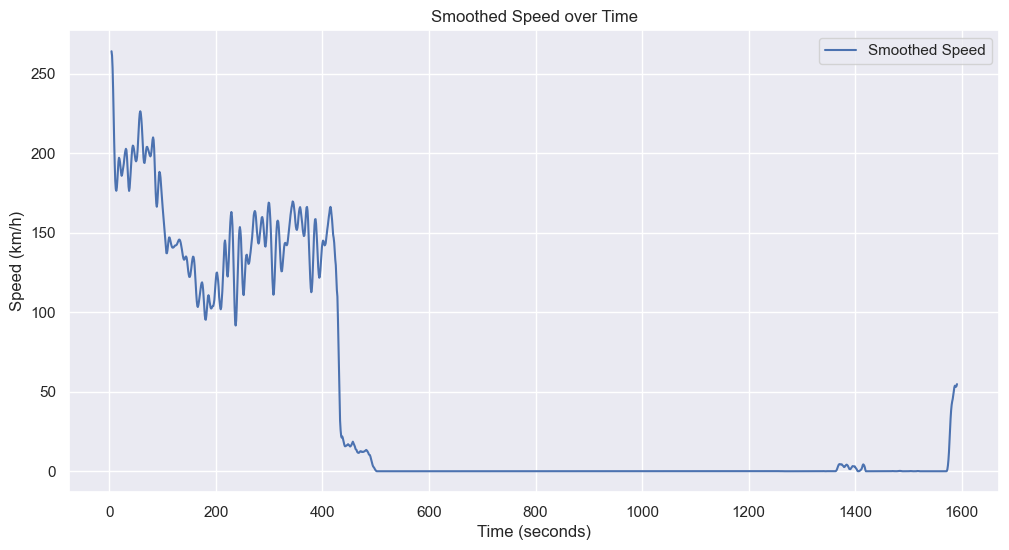

In [5]:
# Speed over Time
df_2020['Time'] = pd.to_timedelta(df_2020['Time'])
df_2020['Time_seconds'] = df_2020['Time'].dt.total_seconds()  # Add Time_seconds for plotting since X days XX:XX:XX format was tedious to work with

# select numeric columns and set Time as the index for resampling
numeric_cols = df_2020.drop(columns=['Time_seconds']).set_index('Time').select_dtypes(include=['number'])

# resample by 1 second intervals and calculate the mean only for numeric columns
df_resampled = numeric_cols.resample('1S').mean().reset_index()

# add a smoothed version of Speed using a rolling average
# basically calculating the average for a sliding time frame, this made the plot easier to read
df_resampled['Speed_smoothed'] = df_resampled['Speed'].rolling(window=5).mean()

# plot the smoothed Speed over Time
plt.figure(figsize=(12, 6))
plt.plot(df_resampled['Time'].dt.total_seconds(), df_resampled['Speed_smoothed'], label='Smoothed Speed')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (km/h)')
plt.title('Smoothed Speed over Time')
plt.legend()
plt.show()

/var/folders/7q/w_k7x3ss7fsgflp_442s596r0000gn/T/ipykernel_13111/1990302801.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_2020_resampled = df_2020_numeric.resample('1S').mean().reset_index()


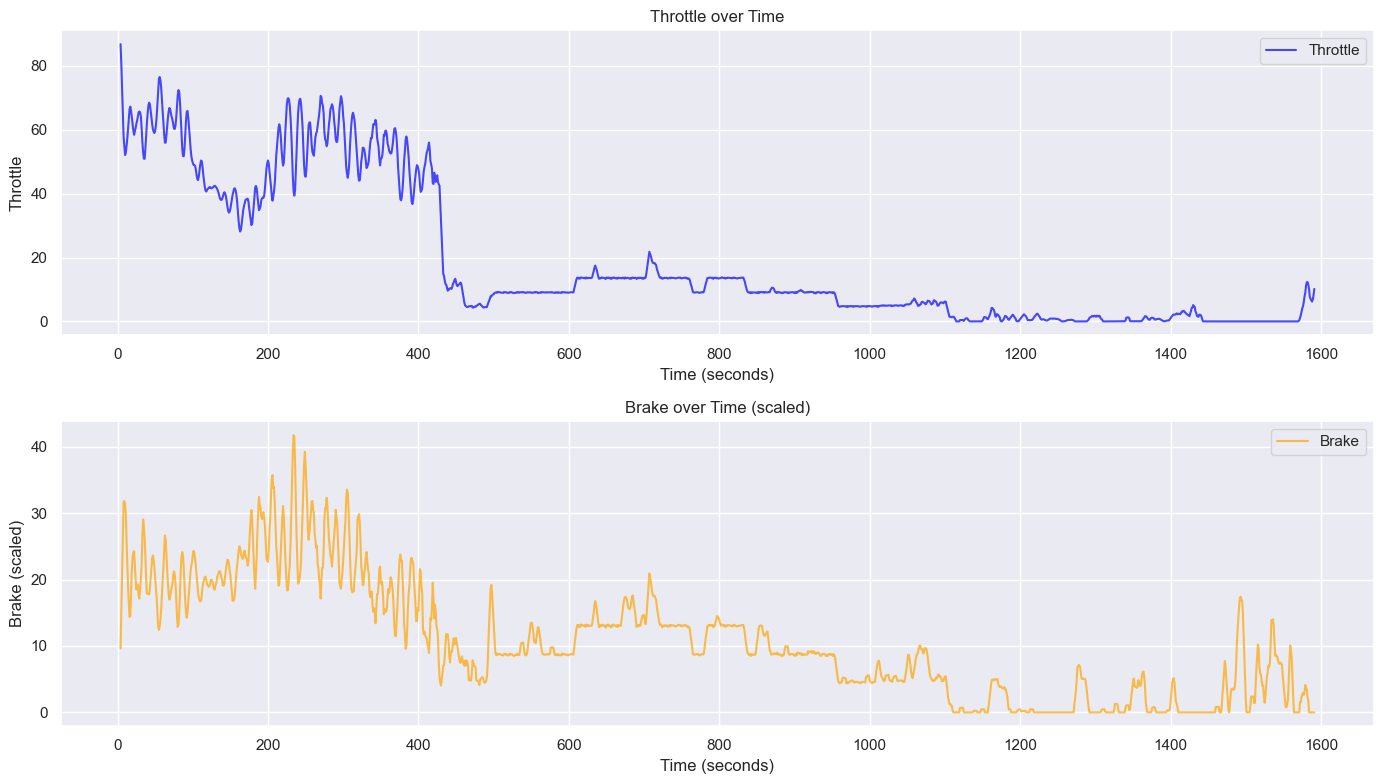

In [7]:
df_2020['Time_delta'] = pd.to_timedelta(df_2020['Time_seconds'], unit='s')

df_2020_numeric = df_2020[['Throttle', 'Brake']].copy()  # ensure only Throttle and Brake are included
df_2020_numeric.index = df_2020['Time_delta']  # set Time_delta as the index because code was giving index errors

# resample by 1 second intervals
df_2020_resampled = df_2020_numeric.resample('1S').mean().reset_index()

# apply rolling average for smoothing (rolling average calculates the mean for the sliding time frame)
df_2020_resampled['Throttle_smoothed'] = df_2020_resampled['Throttle'].rolling(window=5).mean()
df_2020_resampled['Brake_smoothed'] = df_2020_resampled['Brake'].rolling(window=5).mean() * 100  # Scale Brake for visibility

# plot Throttle and Brake separately to avoid clutter
plt.figure(figsize=(14, 8))

# throttle plot
plt.subplot(2, 1, 1)
plt.plot(df_2020_resampled['Time_delta'].dt.total_seconds(), df_2020_resampled['Throttle_smoothed'], label='Throttle', color='blue', alpha=0.7)
plt.title('Throttle over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Throttle')
plt.legend()

# brake plot
plt.subplot(2, 1, 2)
plt.plot(df_2020_resampled['Time_delta'].dt.total_seconds(), df_2020_resampled['Brake_smoothed'], label='Brake', color='orange', alpha=0.7)
plt.title('Brake over Time (scaled)')
plt.xlabel('Time (seconds)')
plt.ylabel('Brake (scaled)')
plt.legend()

plt.tight_layout()
plt.show()


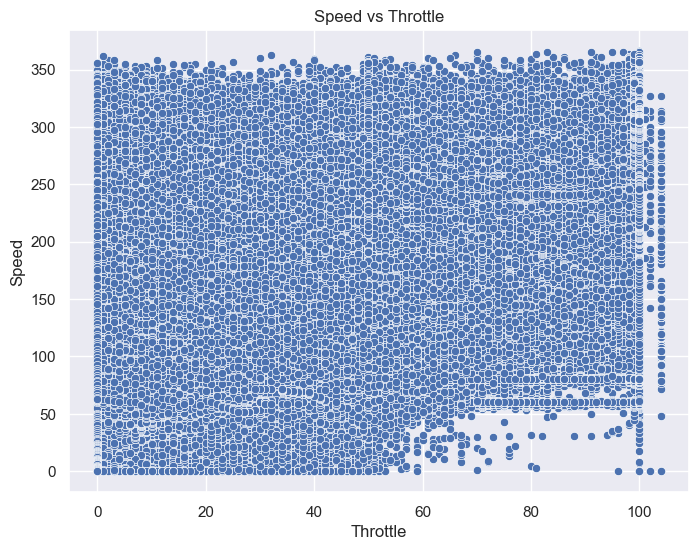

In [ ]:
# analyze relationship between Speed and Throttle
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Throttle', y='Speed', data=df_2020)
plt.title('Speed vs Throttle')
plt.xlabel('Throttle')
plt.ylabel('Speed')
plt.show()

/var/folders/7q/w_k7x3ss7fsgflp_442s596r0000gn/T/ipykernel_13111/3522747513.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  drs_counts = df_2020.set_index('Time_delta')['DRS'].resample('10S').sum()  # Adjust '10S' to desired time window


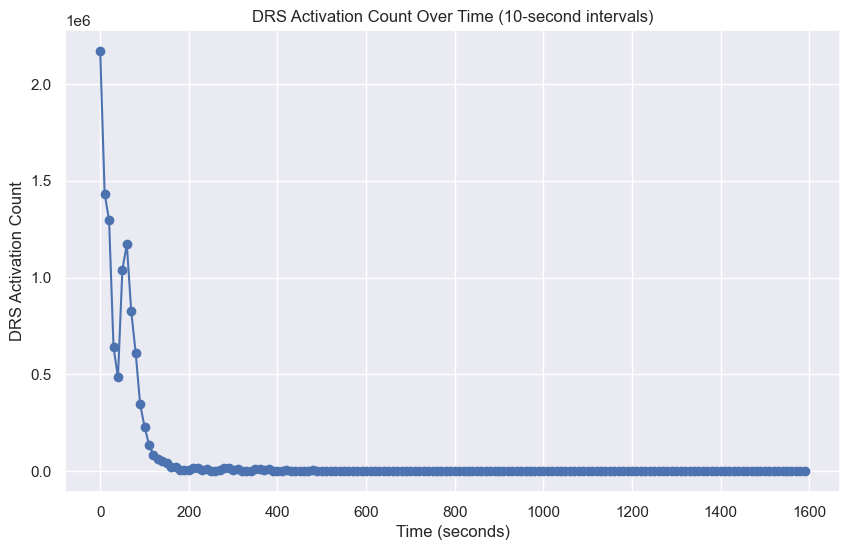

In [9]:
drs_counts = df_2020.set_index('Time_delta')['DRS'].resample('10S').sum() 
# adjust 10S to desired time window

plt.figure(figsize=(10, 6))
plt.plot(drs_counts.index.total_seconds(), drs_counts, marker='o')
plt.title('DRS Activation Count Over Time (10-second intervals)')
plt.xlabel('Time (seconds)')
plt.ylabel('DRS Activation Count')
plt.show()


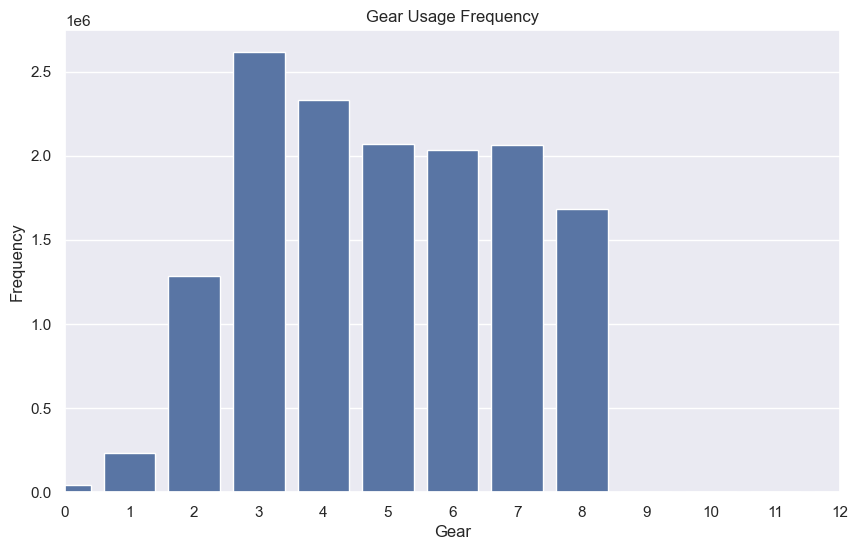

In [ ]:
# gear distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='nGear', data=df_2020)
plt.title('Gear Usage Frequency')
plt.xlabel('Gear')
plt.xlim(0, 12)
plt.ylabel('Frequency')
plt.show()